In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import df_visualizations as dv

from imp import load_source

aps = load_source(  'aggregate_player_stats', '../exploration/aggregate_player_stats.py' )

%matplotlib inline

plt.rcParams['figure.figsize'] = (14,10)
plt.style.use('dark_background')

In [2]:
position = 'QB'
n_weeks  = 4
end_year = 2017

my_df = aps.generate_player_features( end_year, position, n_weeks=n_weeks )

In [3]:
my_df.columns.values

array([u'player_id', u'team', u'week', 'year', u'rush_yds', u'rush_tds',
       u'pass_yds', u'pass_tds', u'pass_int', u'fumb_lost',
       'few_reg_weeks', 'pass_complete_prev_4', 'pass_incomplete_prev_4',
       'pass_int_prev_4', 'pass_air_yds_prev_4', 'pass_air_yds_max_prev_4',
       'pass_yds_prev_4', 'pass_tds_prev_4', 'pass_att_prev_4',
       'rush_yds_prev_4', 'rush_tds_prev_4', 'rush_att_prev_4',
       'fumb_lost_prev_4', 'fumb_rec_prev_4', 'fumb_rec_tds_prev_4',
       'fumb_forced_prev_4', 'fumb_nforced_prev_4', 'sacks_prev_4',
       'sack_yards_prev_4', 'team_home_flag_prev_4',
       'team_away_flag_prev_4', 'team_tds_prev_4', 'team_fg_made_prev_4',
       'team_fg_miss_prev_4', 'team_kickoffs_prev_4', 'team_punts_prev_4',
       'opp_avg_tds_prev_4', 'opp_avg_fg_made_prev_4',
       'opp_avg_rush_yds_prev_4', 'opp_avg_pass_yds_prev_4',
       'opp_avg_def_tkl_loss_prev_4', 'opp_avg_def_sack_prev_4',
       'opp_avg_def_pass_def_prev_4'], dtype=object)

In [3]:
target_variables = ['rush_yds','rush_tds','pass_yds','pass_tds','pass_int','fumb_lost']

player_features  = ['few_reg_weeks','pass_complete_prev_4','pass_incomplete_prev_4',
                    'pass_int_prev_4', 'pass_air_yds_prev_4', 'pass_air_yds_max_prev_4',
                    'pass_yds_prev_4', 'pass_tds_prev_4', 'pass_att_prev_4',
                    'rush_yds_prev_4', 'rush_tds_prev_4', 'rush_att_prev_4']

fumb_features    = ['fumb_lost_prev_4', 'fumb_rec_prev_4', 'fumb_rec_tds_prev_4',
                    'fumb_forced_prev_4', 'fumb_nforced_prev_4']

team_features    = ['team_home_flag_prev_4','team_away_flag_prev_4', 'team_tds_prev_4', 'team_fg_made_prev_4',
                    'team_fg_miss_prev_4', 'team_kickoffs_prev_4', 'team_punts_prev_4',]

opp_features     = ['opp_avg_tds_prev_4', 'opp_avg_fg_made_prev_4','opp_avg_rush_yds_prev_4', 'opp_avg_pass_yds_prev_4',
                    'opp_avg_def_tkl_loss_prev_4', 'opp_avg_def_sack_prev_4', 'opp_avg_def_pass_def_prev_4']

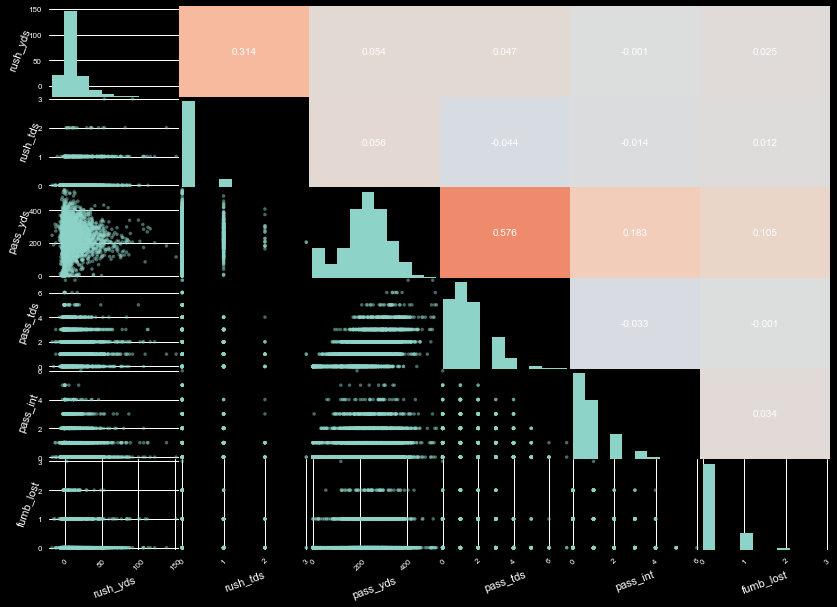

In [13]:
dv.corr_plot( my_df[ target_variables] )

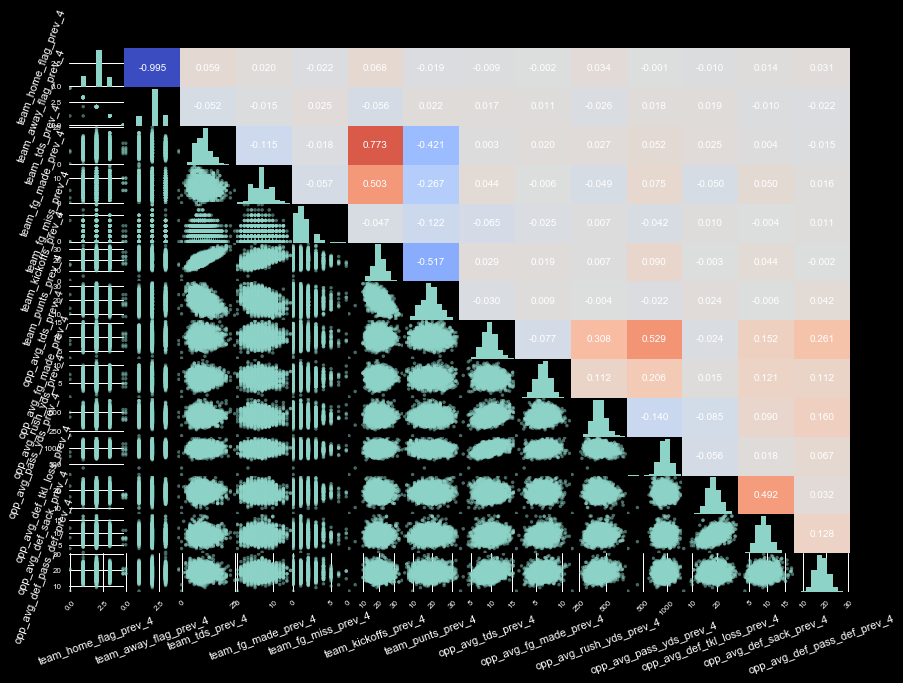

In [19]:
# Team, opposing team stuff generally uncorrelated

dv.corr_plot( my_df[team_features+opp_features] )

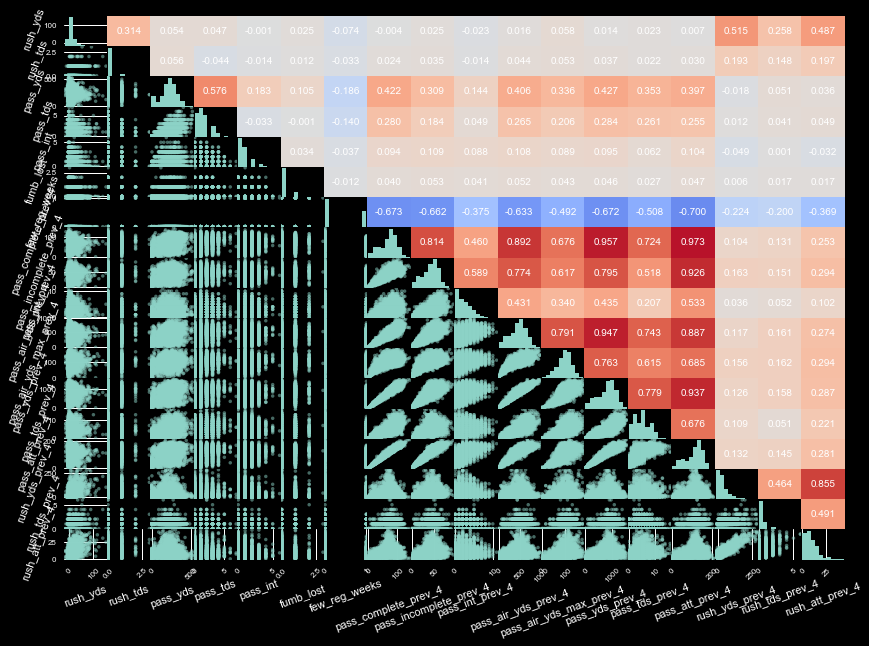

In [15]:
# rush_yds corr with prev _rush yards, _rush_tds, _rush_att
# rush_tds corr slightly with " "

# pass_yds corr with prev pass_complete, pass incomplete, pass_air_yds, pass_air_yds_max, pass_yds, pass_tds, pass_att
# pass_tds corr slightly with " "

# pass int, fumb lost generally uncorrelated

dv.corr_plot( my_df[target_variables+player_features] )

/home/sean/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))
/home/sean/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:3239: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


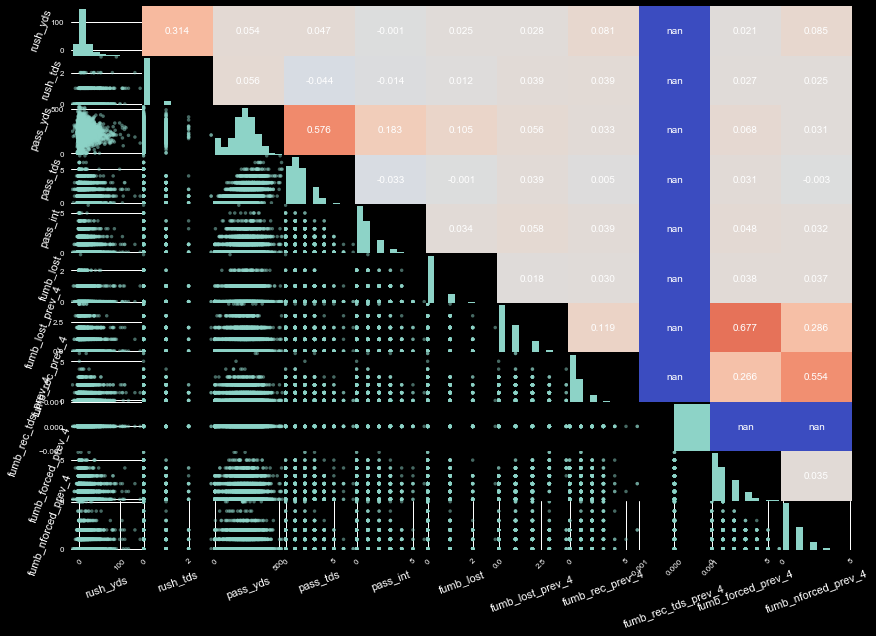

In [16]:
# fumb stuff has some corr, not with targets

dv.corr_plot( my_df[target_variables+fumb_features] )

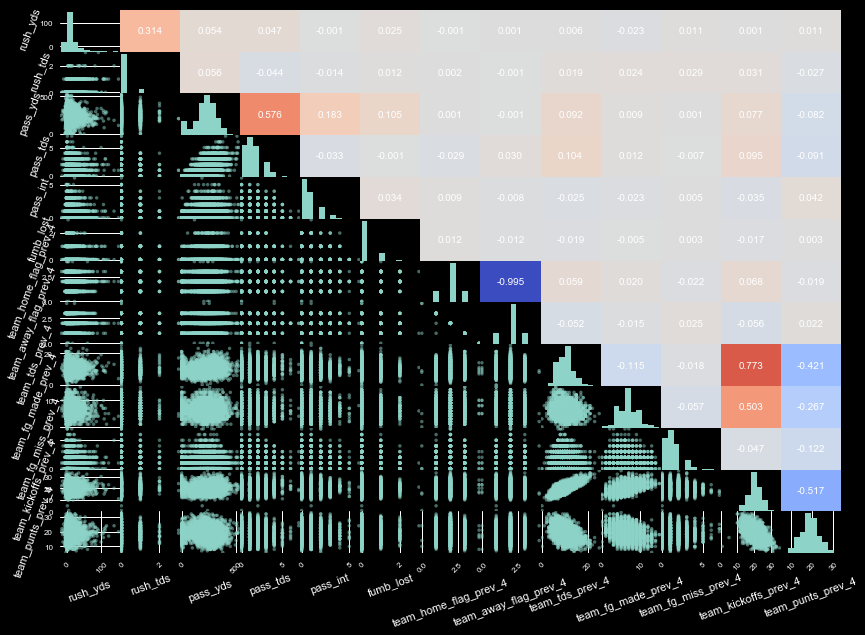

In [17]:
# team stuff generally no corr
# some corr in team stuff

dv.corr_plot( my_df[target_variables+team_features] )

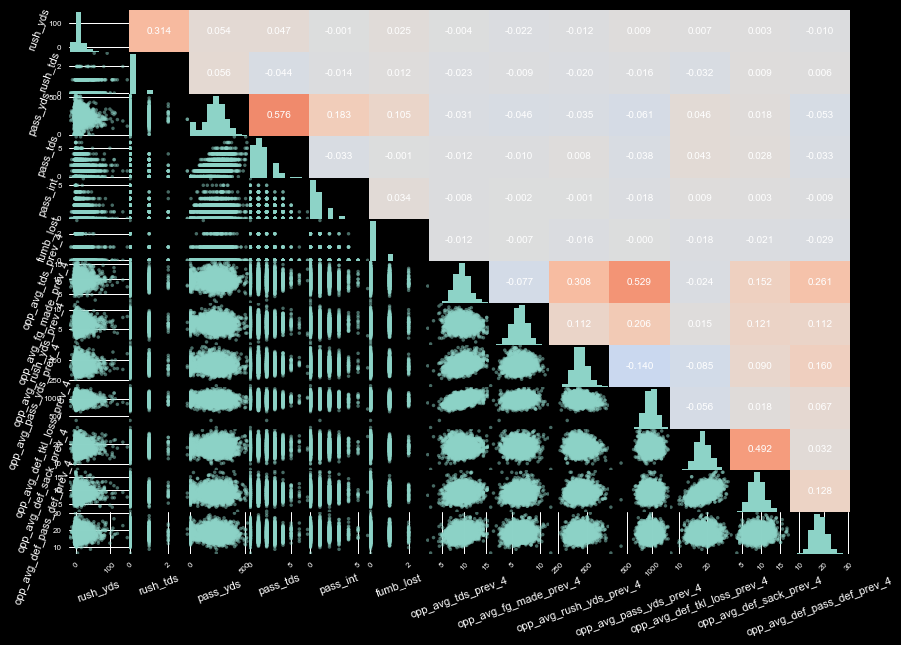

In [18]:
# some corr in opp stuff

dv.corr_plot( my_df[target_variables+opp_features] )

In [4]:
new_feat = my_df[ target_variables ].copy()

new_feat_list = []

new_feat['turnovers'] = new_feat['pass_int'] + new_feat['fumb_lost']

new_feat_list.append( 'turnovers' )

In [5]:
new_feat['pass_frac'] = my_df['pass_complete_prev_4'] / ( my_df['pass_att_prev_4'] + 0. )

new_feat['pass_yds_frac'] = my_df['pass_yds_prev_4'] / ( 0. + my_df['pass_yds_prev_4'] + my_df['rush_yds_prev_4'] )

new_feat['pass_tds_frac'] =(my_df['pass_tds_prev_4'] / ( 0. + my_df['pass_tds_prev_4'] + my_df['rush_tds_prev_4'] ) )

new_feat_list.append( 'pass_frac' )
new_feat_list.append( 'pass_yds_frac' )
new_feat_list.append( 'pass_tds_frac' )

In [6]:
new_feat['fumb_lost_frac'] = my_df['fumb_lost_prev_4'] / ( 0. + my_df['fumb_lost_prev_4'] + my_df['fumb_rec_prev_4'] )

new_feat['fumb_force_frac'] = my_df['fumb_forced_prev_4'] / ( 0. + my_df['fumb_forced_prev_4'] + my_df['fumb_nforced_prev_4'] )

new_feat_list.append( 'fumb_lost_frac' )
new_feat_list.append( 'fumb_force_frac' )

In [7]:
new_feat['team_home_frac'] = my_df['team_home_flag_prev_4'] / ( 0. + my_df['team_home_flag_prev_4'] + my_df['team_away_flag_prev_4'] )

new_feat['fg_made_frac'] = my_df['team_fg_made_prev_4'] / ( 0. + my_df['team_fg_made_prev_4'] + my_df['team_fg_miss_prev_4'] )

new_feat['score_drive_frac'] = my_df['team_kickoffs_prev_4'] / ( 0. + my_df['team_kickoffs_prev_4'] + my_df['team_punts_prev_4'] )

new_feat['team_tds_frac'] = my_df['team_tds_prev_4'] / ( 0. + my_df['team_tds_prev_4'] + my_df['team_kickoffs_prev_4'] )

new_feat_list.append( 'team_home_frac' )
new_feat_list.append( 'fg_made_frac' )
new_feat_list.append( 'score_drive' )
new_feat_list.append( 'team_tds_frac' )

In [8]:
new_feat['opp_avg_tds_frac'] = my_df['opp_avg_tds_prev_4'] / ( 0. + my_df['opp_avg_tds_prev_4'] + my_df['opp_avg_fg_made_prev_4'] )

new_feat['opp_avg_pass_yds_frac'] = my_df['opp_avg_pass_yds_prev_4'] / ( 0. + my_df['opp_avg_pass_yds_prev_4'] + 
                                                                              my_df['opp_avg_rush_yds_prev_4'] )

new_feat_list.append( 'opp_avg_tds_frac' )
new_feat_list.append( 'opp_avg_pass_yds_frac' )

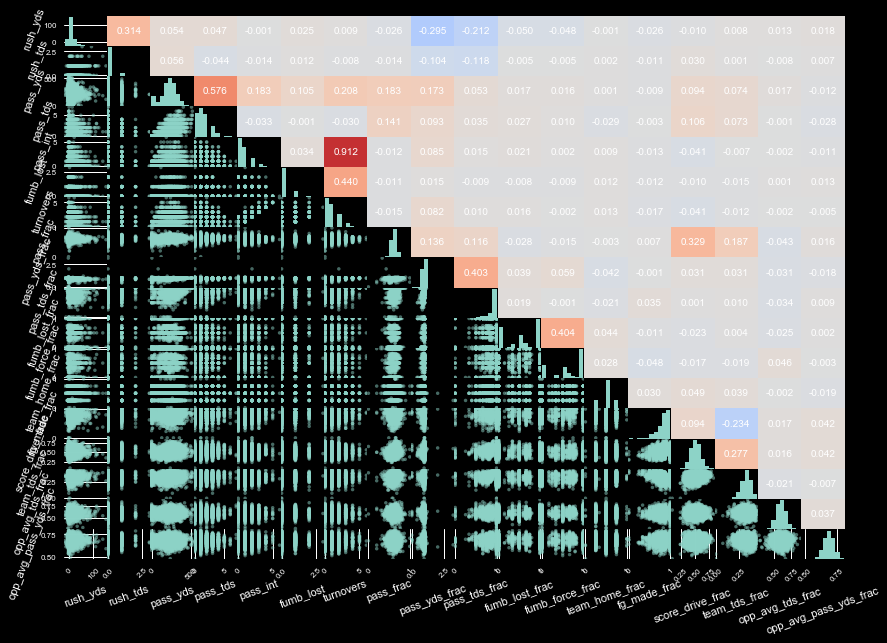

In [44]:
dv.corr_plot( new_feat )

In [46]:
# Rush yards correlated with pass yds frac, pass tds frac. 
# These are less than values without combining the variables.
# Other than that nothing new gained by the features.

In [4]:
target_variables = ['rush_yds','rush_tds','pass_yds','pass_tds','pass_int','fumb_lost']

player_features  = ['few_reg_weeks','pass_complete_prev_4','pass_incomplete_prev_4',
                    'pass_int_prev_4', 'pass_air_yds_prev_4', 'pass_air_yds_max_prev_4',
                    'pass_yds_prev_4', 'pass_tds_prev_4', 'pass_att_prev_4',
                    'rush_yds_prev_4', 'rush_tds_prev_4', 'rush_att_prev_4']

fumb_features    = ['fumb_lost_prev_4', 'fumb_rec_prev_4', 'fumb_rec_tds_prev_4',
                    'fumb_forced_prev_4', 'fumb_nforced_prev_4']

team_features    = ['team_home_flag_prev_4','team_away_flag_prev_4', 'team_tds_prev_4', 'team_fg_made_prev_4',
                    'team_fg_miss_prev_4', 'team_kickoffs_prev_4', 'team_punts_prev_4',]

opp_features     = ['opp_avg_tds_prev_4', 'opp_avg_fg_made_prev_4','opp_avg_rush_yds_prev_4', 'opp_avg_pass_yds_prev_4',
                    'opp_avg_def_tkl_loss_prev_4', 'opp_avg_def_sack_prev_4', 'opp_avg_def_pass_def_prev_4']

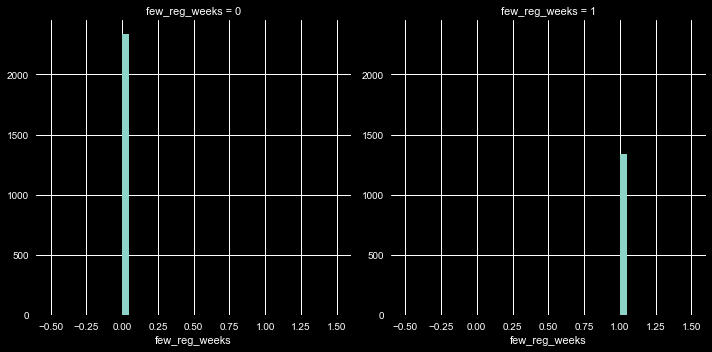

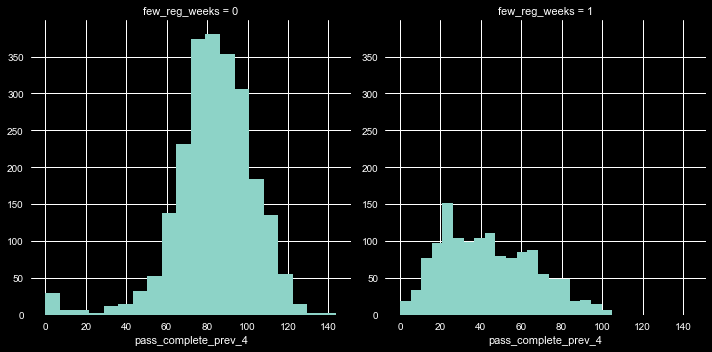

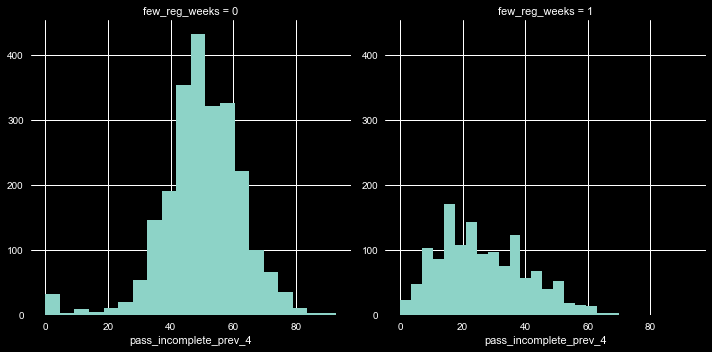

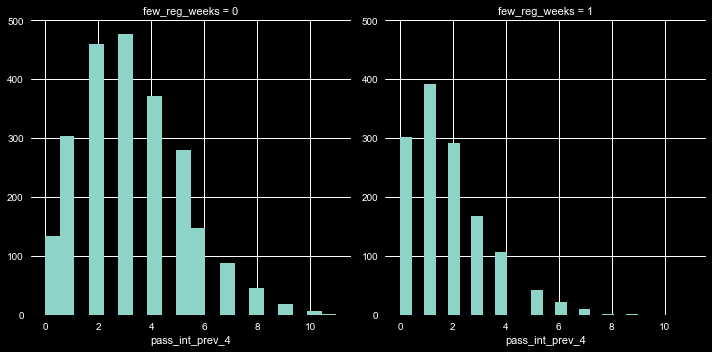

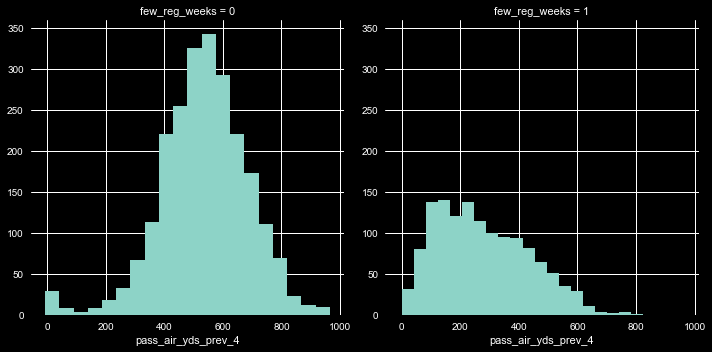

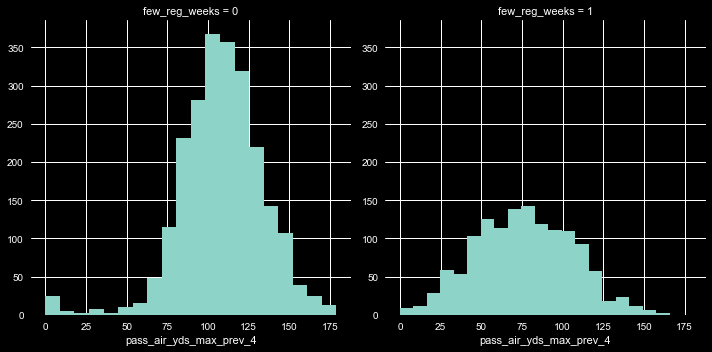

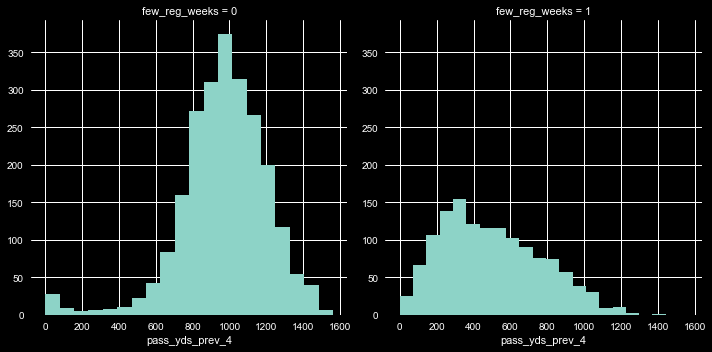

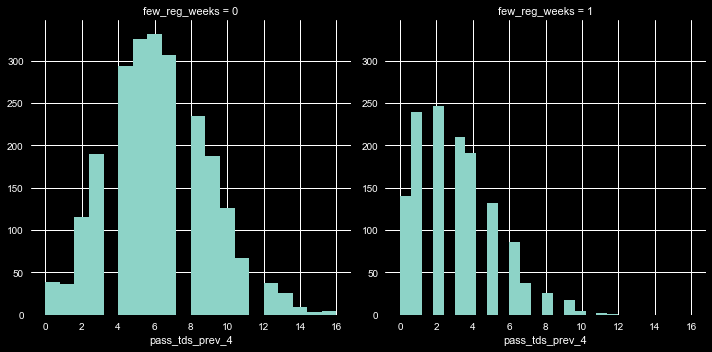

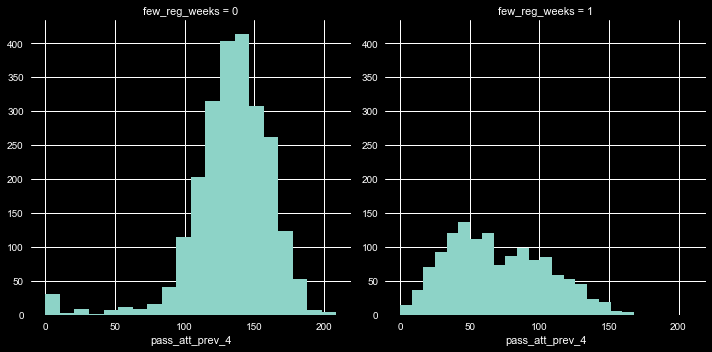

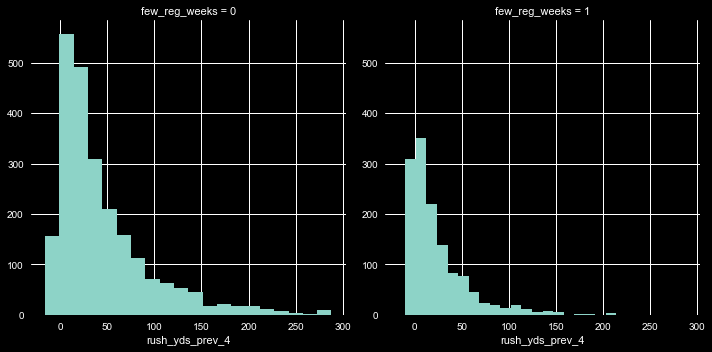

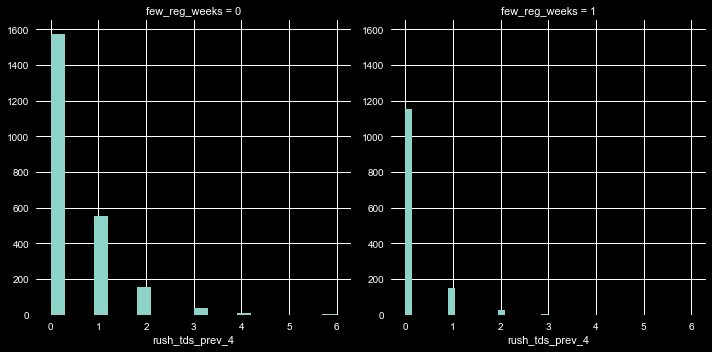

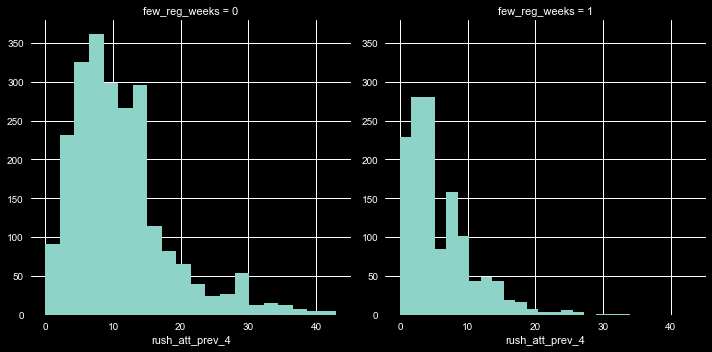

In [22]:
for col in player_features:
    g = sns.FacetGrid( data=my_df, col='few_reg_weeks', size=5 )
    g.map( plt.hist, col, bins=20 )
    plt.show()

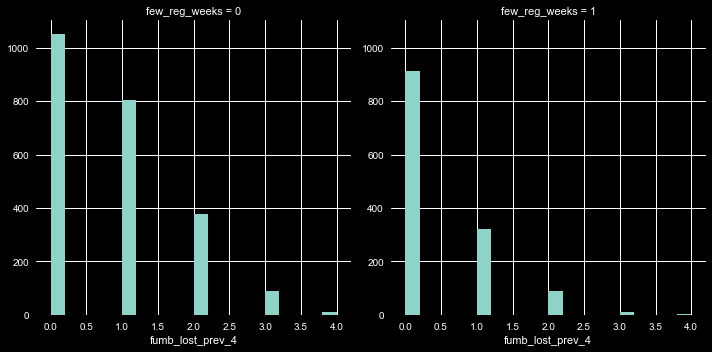

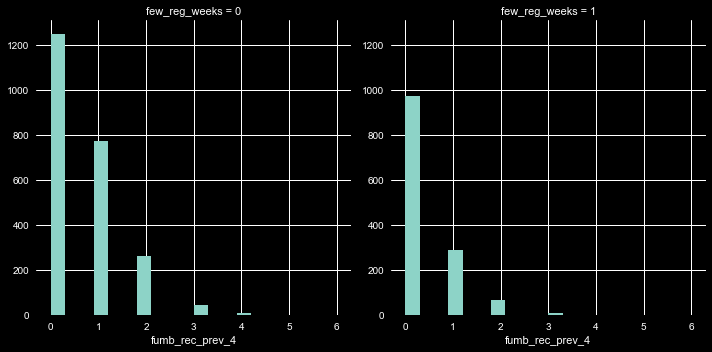

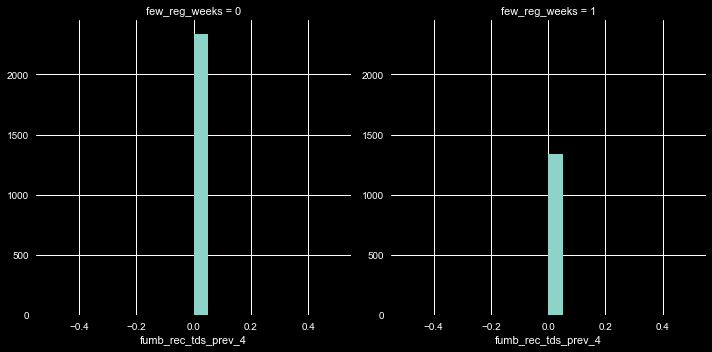

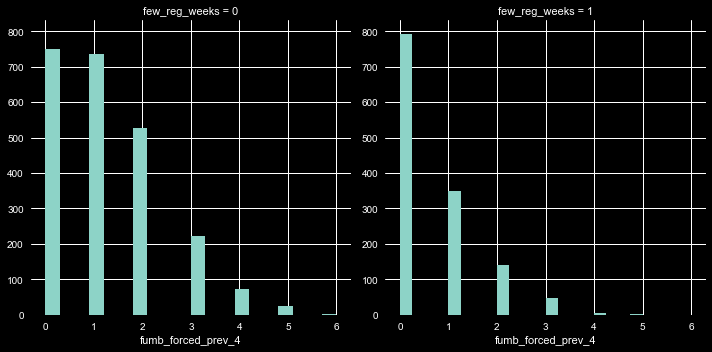

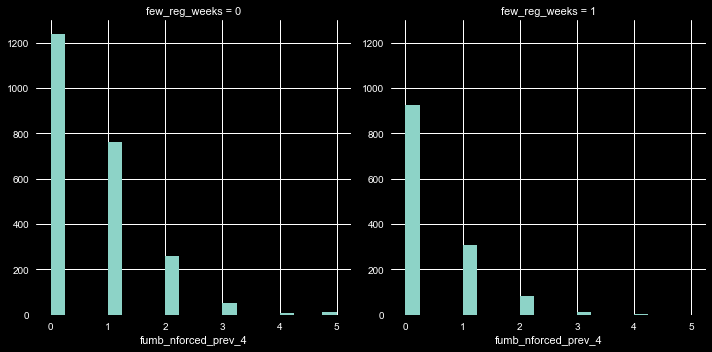

In [16]:
for col in fumb_features:
    g = sns.FacetGrid( data=my_df, col='few_reg_weeks', size=5 )
    g.map( plt.hist, col, bins=20 )
    plt.show()

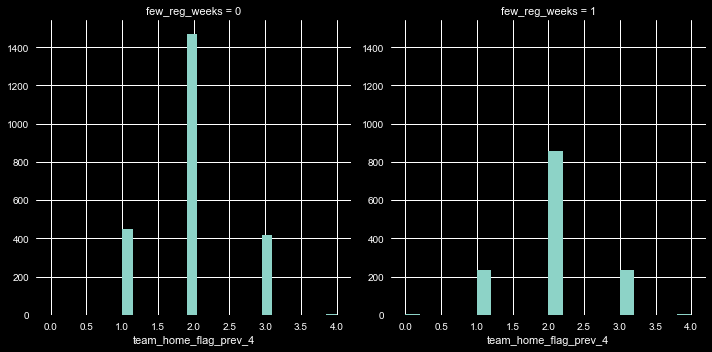

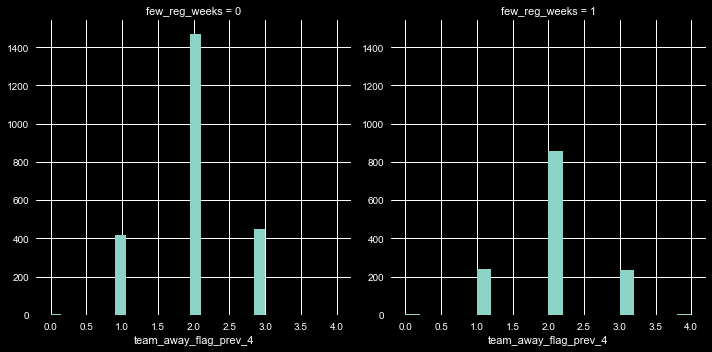

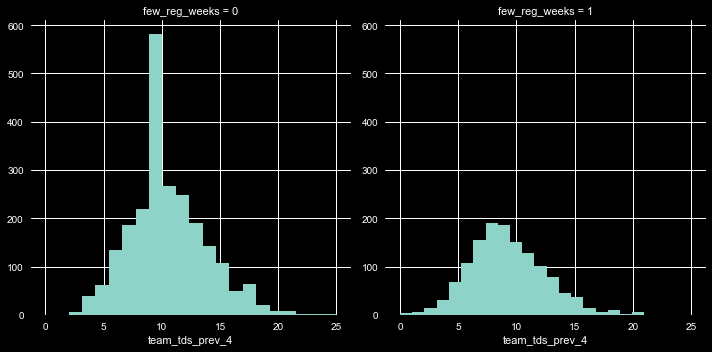

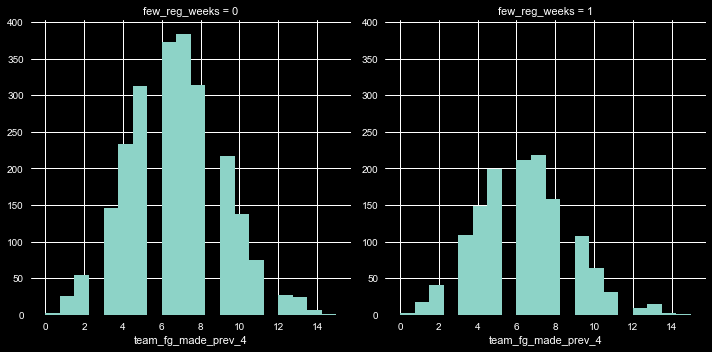

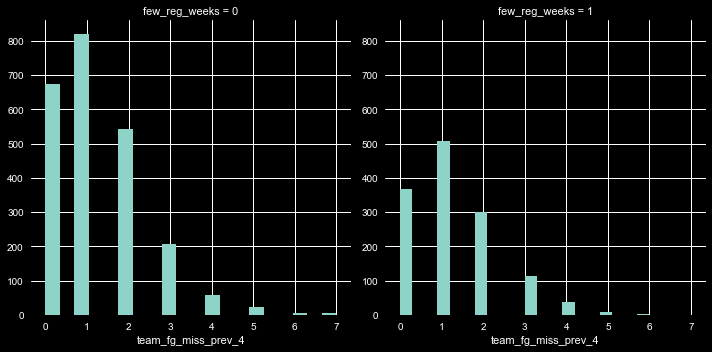

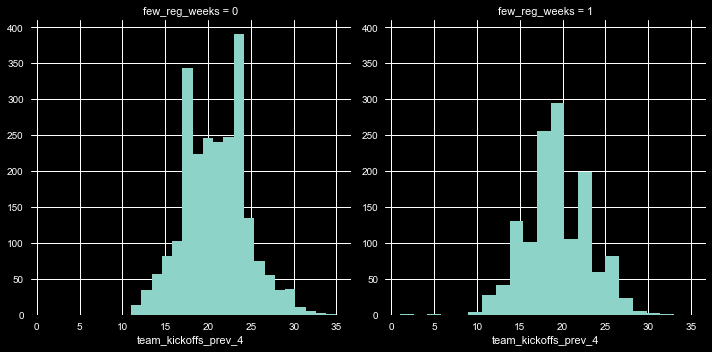

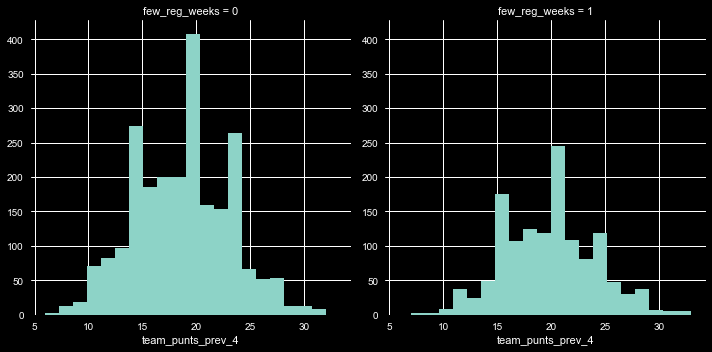

In [17]:
for col in team_features:
    g = sns.FacetGrid( data=my_df, col='few_reg_weeks', size=5 )
    g.map( plt.hist, col, bins=20 )
    plt.show()

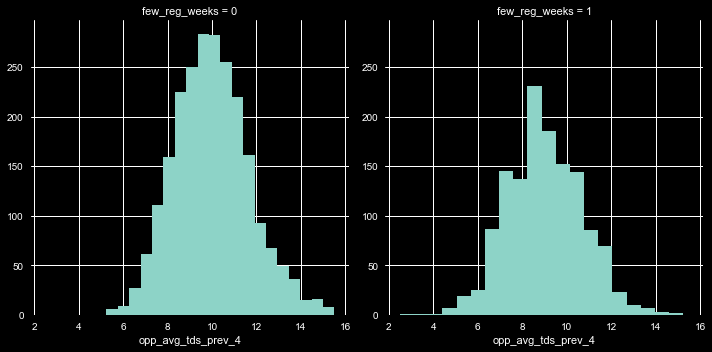

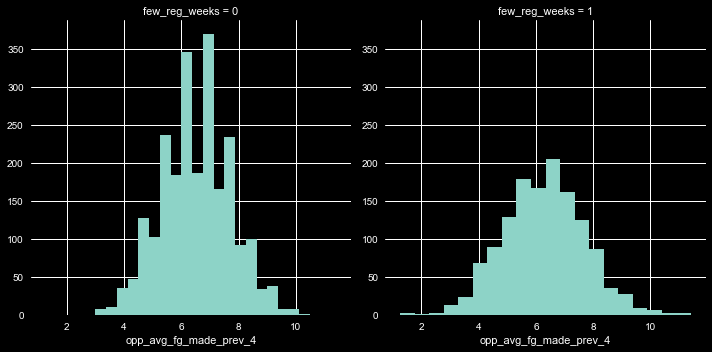

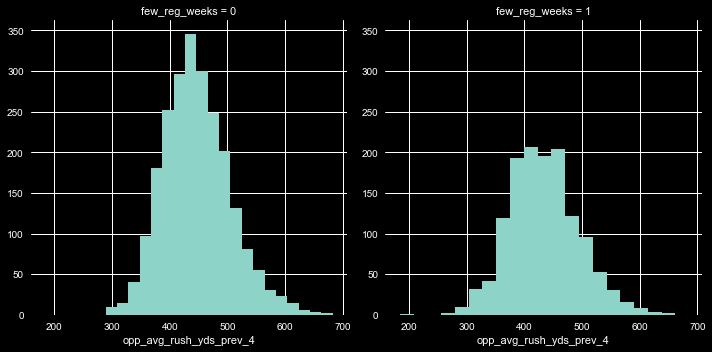

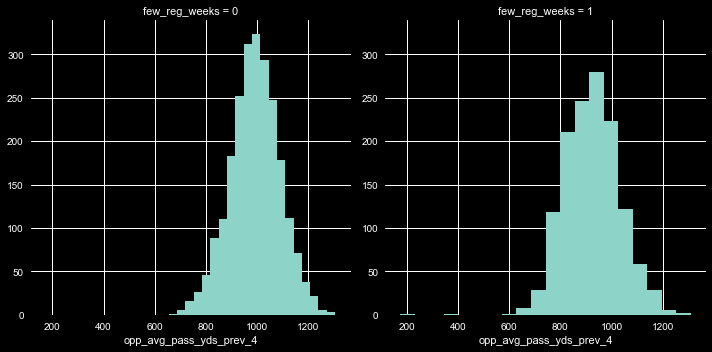

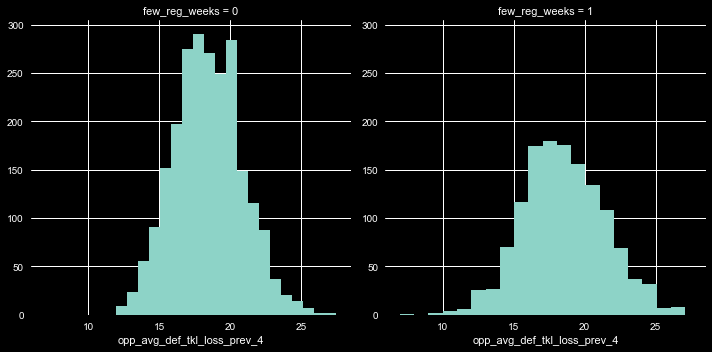

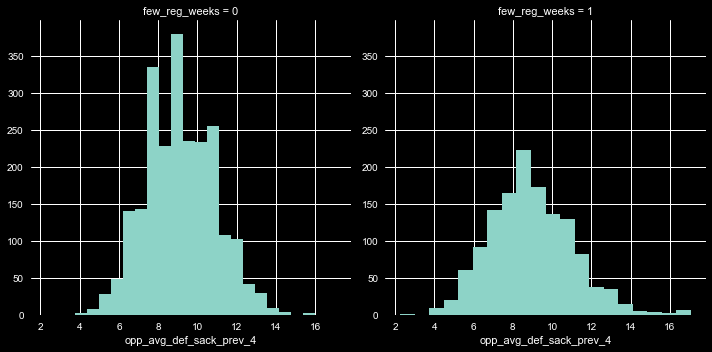

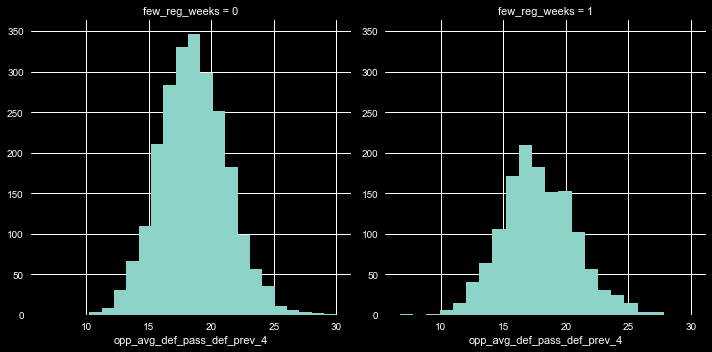

In [18]:
for col in opp_features:
    g = sns.FacetGrid( data=my_df, col='few_reg_weeks', size=5 )
    g.map( plt.hist, col, bins=20 )
    plt.show()

Only player features show a big difference between few reg weeks.

When normalizing, may want to distinguish between normalizations.

In [23]:
norm_dict = {}

Start with fumbles...

In [30]:
inp_df[fumb_features].describe()

,fumb_lost_prev_4,fumb_rec_prev_4,fumb_rec_tds_prev_4,fumb_forced_prev_4,fumb_nforced_prev_4
count,3668.000000,3668.000000,3668.0,3668.000000,3668.000000
mean,0.655671,0.521265,0.0,1.003817,0.567067
std,0.825704,0.744646,0.0,1.102585,0.810771
min,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.000000,0.000000,0.0,1.000000,0.000000
75%,1.000000,1.000000,0.0,2.000000,1.000000
max,4.000000,6.000000,0.0,6.000000,5.000000


In [78]:
from sklearn.decomposition import PCA
from scipy.stats import boxcox


inp_df = my_df.copy()
fumb_norm_feats = []

# Do min max normalization
# Roughly poissonian
for col in ['fumb_lost_prev_4','fumb_rec_prev_4','fumb_forced_prev_4','fumb_nforced_prev_4']:

    col_norm = col+'_norm'
    
    # Perform normalization
    inp_df[col_norm] = ( inp_df[col] - inp_df[col].min() ) / ( inp_df[col].max() - inp_df[col].min() )
    fumb_norm_feats.append( col_norm )

    # Save values used
    norm_dict[col_norm+'_min'] = inp_df[col].min()
    norm_dict[col_norm+'_max'] = inp_df[col].max()

    
# PCA since lots of overlapping data
#  captures ~83%
fumb_pca = PCA( n_components=2 )
fumb_pca.fit( inp_df[fumb_norm_feats] )


# Save this PCA when implementing model
norm_dict['fumble_pca'] = fumb_pca


# Get the transformed values
pca_vals = fumb_pca.transform( inp_df[fumb_norm_feats] )


# Save transformed into our frame
inp_df['fumb_pca_0'] = pca_vals[:,0]
inp_df['fumb_pca_1'] = pca_vals[:,1]


# Perform box cox transformation, 
#  to make the distribution more normal
inp_df['fumb_pca_1_bc'] = boxcox( inp_df['fumb_pca_1']+1., -1 )


## save cols in seperate list
# Return these values, min/max norm of pca 0, zscale of pca 1
col =  'fumb_pca_0'
inp_df['fumb_pca_0_norm'] = ( 2*( inp_df[col]       - inp_df[col].min() ) / 
                                ( inp_df[col].max() - inp_df[col].min() ) - 1. )


# Save used values
norm_dict[col+'_min'] = inp_df[col].min()
norm_dict[col+'_max'] = inp_df[col].max()


col =  'fumb_pca_1_bc'
inp_df['fumb_pca_1_bc_scaled'] = ( inp_df[col] - inp_df[col].mean() ) / inp_df[col].std()


# Save used values
norm_dict[col+'_mean'] = inp_df[col].mean()
norm_dict[col+'_std' ] = inp_df[col].std()

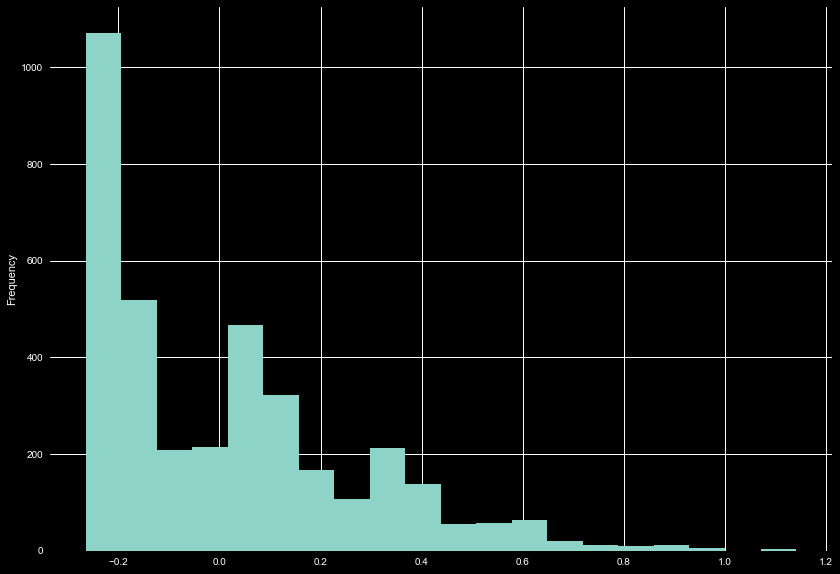

In [53]:
inp_df['fumb_pca_0'].plot.hist(bins=20)
plt.show()

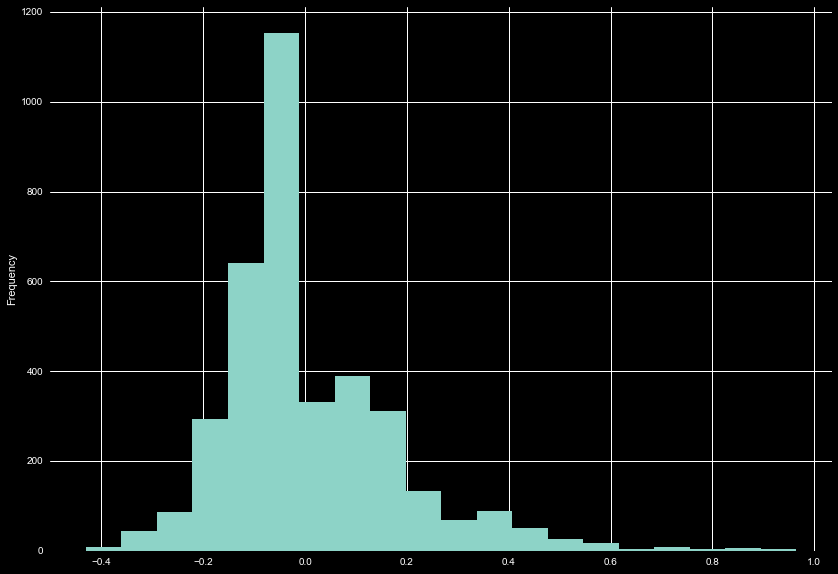

In [54]:
inp_df['fumb_pca_1'].plot.hist(bins=20)
plt.show()

In [81]:
team_features

['team_home_flag_prev_4',
 'team_away_flag_prev_4',
 'team_tds_prev_4',
 'team_fg_made_prev_4',
 'team_fg_miss_prev_4',
 'team_kickoffs_prev_4',
 'team_punts_prev_4']

In [82]:
my_df[team_features].describe()

,team_home_flag_prev_4,team_away_flag_prev_4,team_tds_prev_4,team_fg_made_prev_4,team_fg_miss_prev_4,team_kickoffs_prev_4,team_punts_prev_4
count,3668.000000,3668.000000,3668.000000,3668.000000,3668.000000,3668.000000,3668.000000
mean,1.993184,2.005180,10.059160,6.479826,1.247819,20.262814,19.067612
std,0.611415,0.610539,3.234923,2.423383,1.121441,3.773035,4.346815
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000
25%,2.000000,2.000000,8.000000,5.000000,0.000000,18.000000,16.000000
50%,2.000000,2.000000,10.000000,6.000000,1.000000,20.000000,19.000000
75%,2.000000,2.000000,12.000000,8.000000,2.000000,23.000000,22.000000
max,4.000000,4.000000,25.000000,15.000000,7.000000,35.000000,33.000000


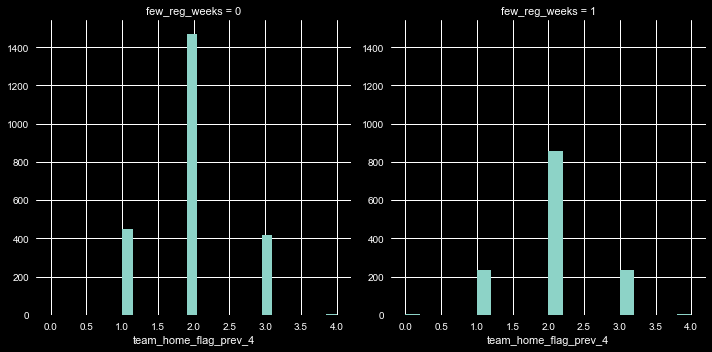

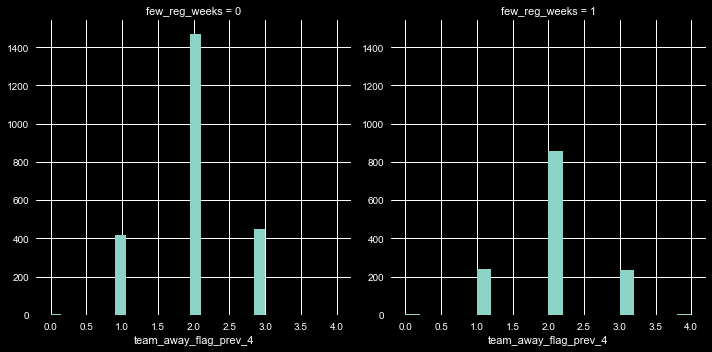

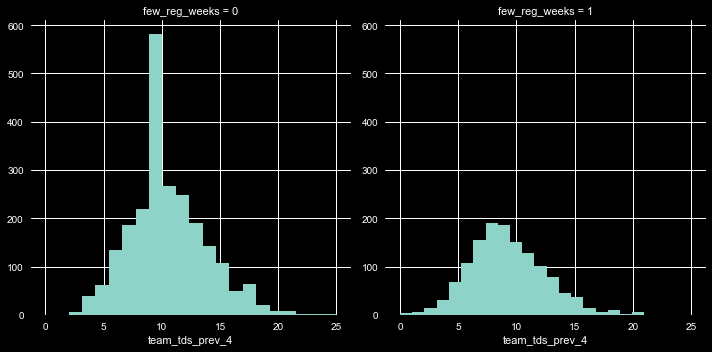

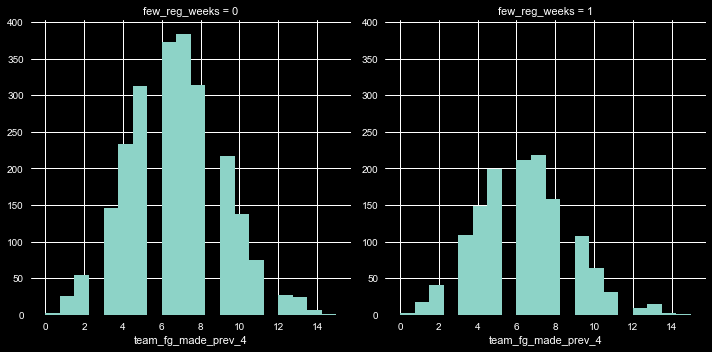

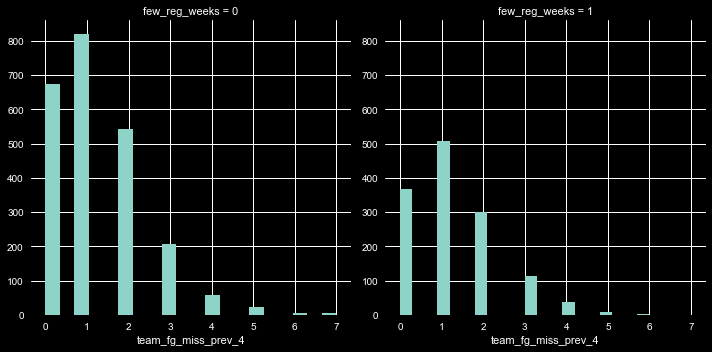

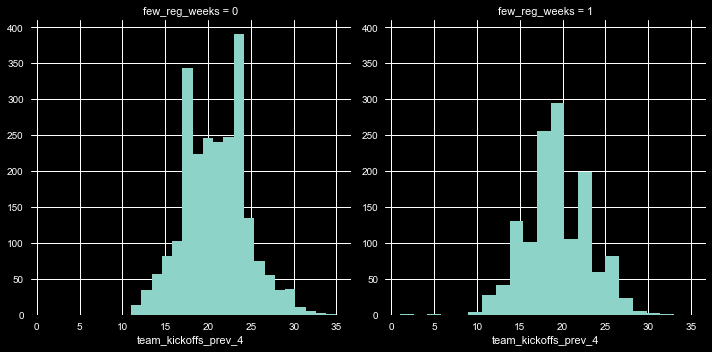

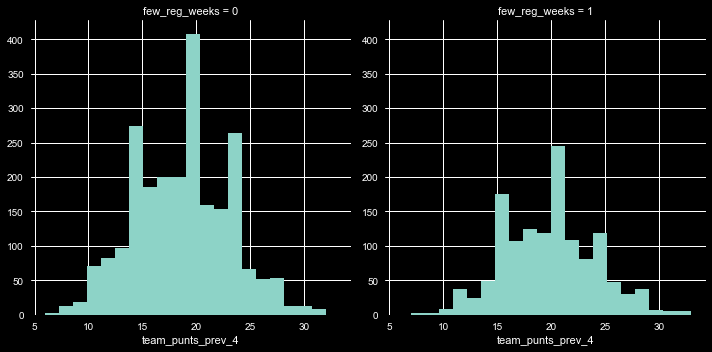

In [17]:
for col in team_features:
    g = sns.FacetGrid( data=my_df, col='few_reg_weeks', size=5 )
    g.map( plt.hist, col, bins=20 )
    plt.show()

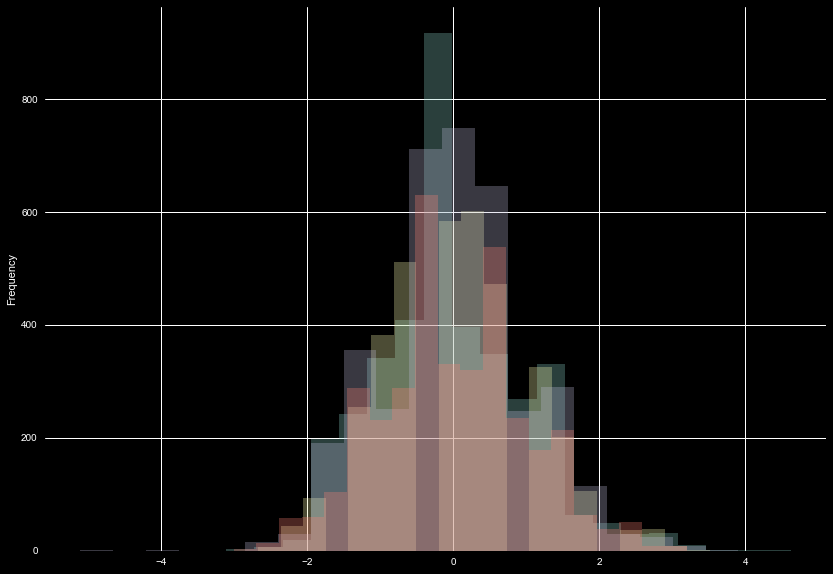

In [88]:
from sklearn.decomposition import PCA
from scipy.stats import boxcox


inp_df = my_df.copy()
team_norm_feats = []

# Do min max normalization
# Roughly poissonian
for col in ['team_tds_prev_4','team_fg_made_prev_4',
            'team_kickoffs_prev_4','team_punts_prev_4']:

    col_norm = col+'_scaled'
    
    # Perform scaling
    inp_df[col_norm] = ( inp_df[col] - inp_df[col].mean() ) / ( inp_df[col].std() )
    team_norm_feats.append( col_norm )

    # Save values used
    norm_dict[col_norm+'_mean'] = inp_df[col].mean()
    norm_dict[col_norm+'_std' ] = inp_df[col].std()
    

# PCA since lots of overlapping data
#  captures ~85%
team_pca = PCA( n_components=2 )
team_pca.fit( inp_df[team_norm_feats] )
team_pca.explained_variance_ratio_

## Save this PCA when implementing model
norm_dict['team_pca'] = team_pca


## Get the transformed values
pca_vals = team_pca.transform( inp_df[team_norm_feats] )


## Save transformed into our frame
inp_df['team_pca_0'] = pca_vals[:,0]
inp_df['team_pca_1'] = pca_vals[:,1]

# The pca things are fairly normally distributed, 
#  so just zscale

## Save both column names for returning
col =  'team_pca_0'
inp_df['team_pca_0_scaled'] = ( inp_df[col] - inp_df[col].mean() ) / ( inp_df[col].std() )

# Save used values
norm_dict[col+'_mean'] = inp_df[col].mean()
norm_dict[col+'_std' ] = inp_df[col].std()

col =  'team_pca_1'
inp_df['team_pca_1_scaled'] = ( inp_df[col] - inp_df[col].mean() ) / ( inp_df[col].std() )

# Save used values
norm_dict[col+'_mean'] = inp_df[col].mean()
norm_dict[col+'_std' ] = inp_df[col].std()

# This one was poissonian
col =  'team_fg_miss_prev_4'
inp_df['team_fg_miss_prev_4_norm']=( 2*( inp_df[col]       - inp_df[col].min() ) / 
                                       ( inp_df[col].max() - inp_df[col].min() ) - 1. )
norm_dict[col+'_min'] = inp_df[col].min()
norm_dict[col+'_max'] = inp_df[col].max()

count    3.668000e+03
mean     6.409207e-17
std      1.508855e+00
min     -4.743626e+00
25%     -1.039429e+00
50%     -1.633044e-02
75%      1.001521e+00
max      5.805332e+00
Name: team_pca_0, dtype: float64


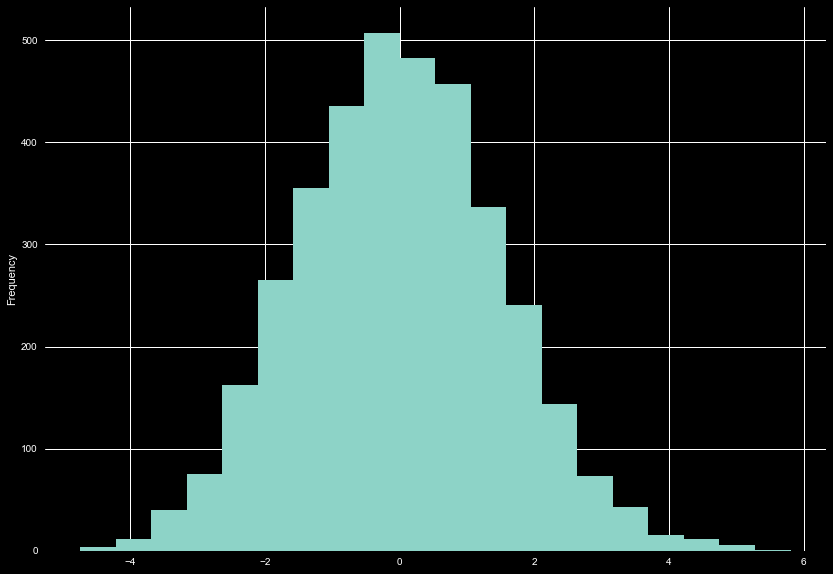

In [97]:
print inp_df['team_pca_0'].describe()
inp_df['team_pca_0'].plot.hist(bins=20)
plt.show()

count    3.668000e+03
mean     9.420854e-18
std      1.051301e+00
min     -3.654130e+00
25%     -6.861379e-01
50%     -7.760936e-03
75%      7.075145e-01
max      3.665589e+00
Name: team_pca_1, dtype: float64


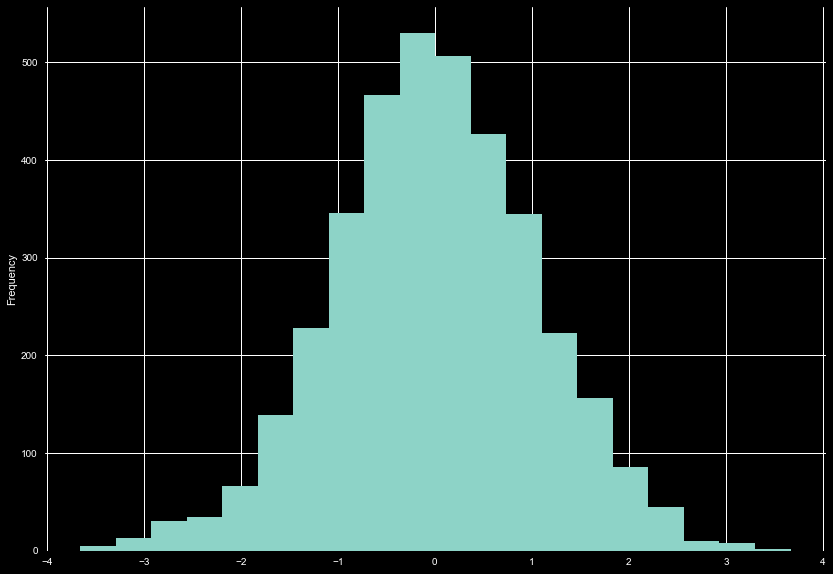

In [98]:
print inp_df['team_pca_1'].describe()
inp_df['team_pca_1'].plot.hist(bins=20)
plt.show()